In [1]:
from Wavelet_Fast import *

import numpy as np
import matplotlib
from scipy import  ndimage
from astropy.io import fits

Wavelet Scale Analysis of M74 before and after being smoothed by a gaussian filter:

In [21]:
scale_triplet = [5,50,5]
cube_og = pethat_wavelet_scale_analysis('M74_g', 'starless_m74_g_binned.fit', scales_in = scale_triplet, scales_type="triplet")

Commencing the wavelet scale analysis of M74_g
|████████████████████████████████████████| 50/50 [100%] in 8:20.8 (0.10/s) 
Wavelet scale analysis of M74_g has finished.


<Figure size 640x480 with 0 Axes>

In [27]:
original = cube_og.original
sigma = 75

conved = ndimage.gaussian_filter(original,sigma)
save_array_as_FITS(conved,'starless_m74_g_S'+str(sigma))

Commencing the wavelet scale analysis of M74_g_75
|████████████████████████████████████████| 50/50 [100%] in 8:40.3 (0.10/s) 
Wavelet scale analysis of M74_g_75 has finished.
The normal correlation between the maps is:  0.9916374465393015


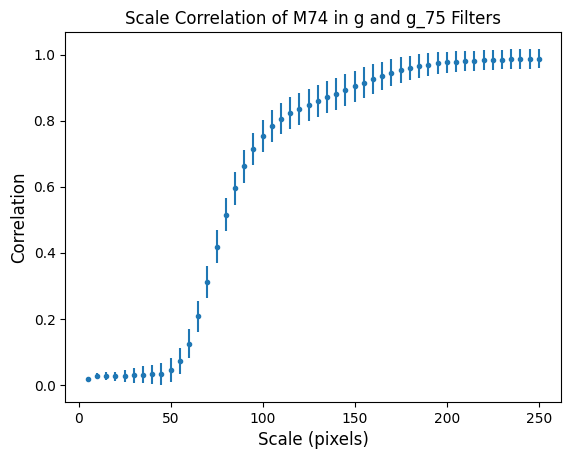

<Figure size 640x480 with 0 Axes>

In [28]:
cube_f1 = pethat_wavelet_scale_analysis('M74_g_75', 'starless_m74_g_S75.fits', scales_in = scale_triplet, normalize=False)

plot_correlation(cube_og,cube_f1,do_show=True)

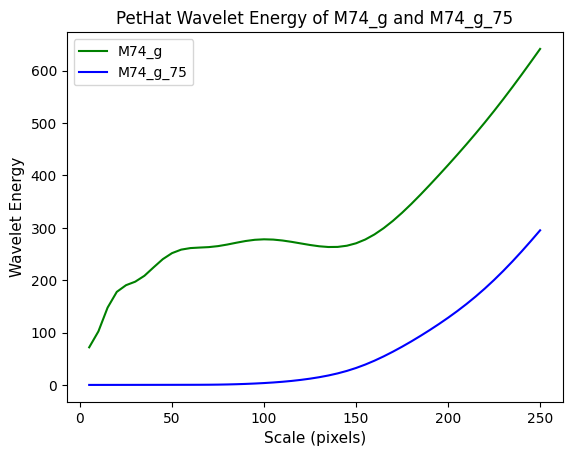

In [29]:
energy_og = cube_og.calc_energies()
energy_f1 = cube_f1.calc_energies(do_plot=False)

plt.plot(cube_og.scales,energy_og,label=cube_og.name,color='green')
plt.plot(cube_f1.scales,energy_f1,label=cube_f1.name,color='blue')
plt.xlabel(r'Scale (pixels)', fontsize=11)
plt.ylabel(r'Wavelet Energy', fontsize=11)
plt.legend()
plt.title('PetHat Wavelet Energy of '+cube_og.name+' and '+cube_f1.name, fontsize=12)
plt.savefig(path+'\\Output\\pethat_energy_'+cube_og.name+'_and_'+cube_f1.name+'.png', dpi=300)
plt.show()



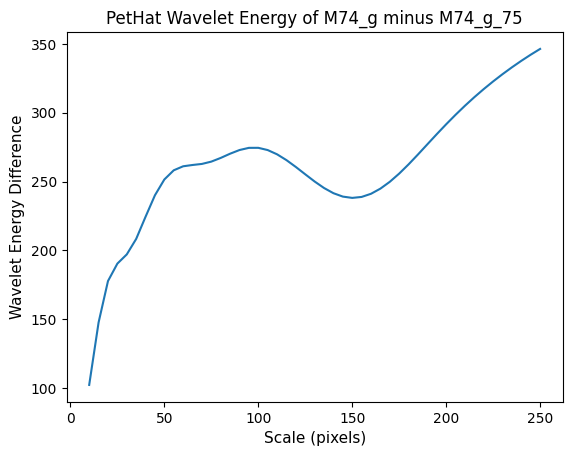

In [30]:
plt.plot(cube_og.scales[1:],energy_og[1:]-energy_f1[1:])
plt.xlabel(r'Scale (pixels)', fontsize=11)
plt.ylabel(r'Wavelet Energy Difference', fontsize=11)
plt.title('PetHat Wavelet Energy of '+cube_og.name+' minus '+cube_f1.name, fontsize=12)
plt.savefig(path+'\\Output\\pethat_energy_'+cube_og.name+'_minus_'+cube_f1.name+'.png', dpi=300)
plt.show()

Saving the layers of M74_g as PNG ... DONE
Creating GIF from the coefficients of M74_g ... DONE


<Figure size 640x480 with 0 Axes>

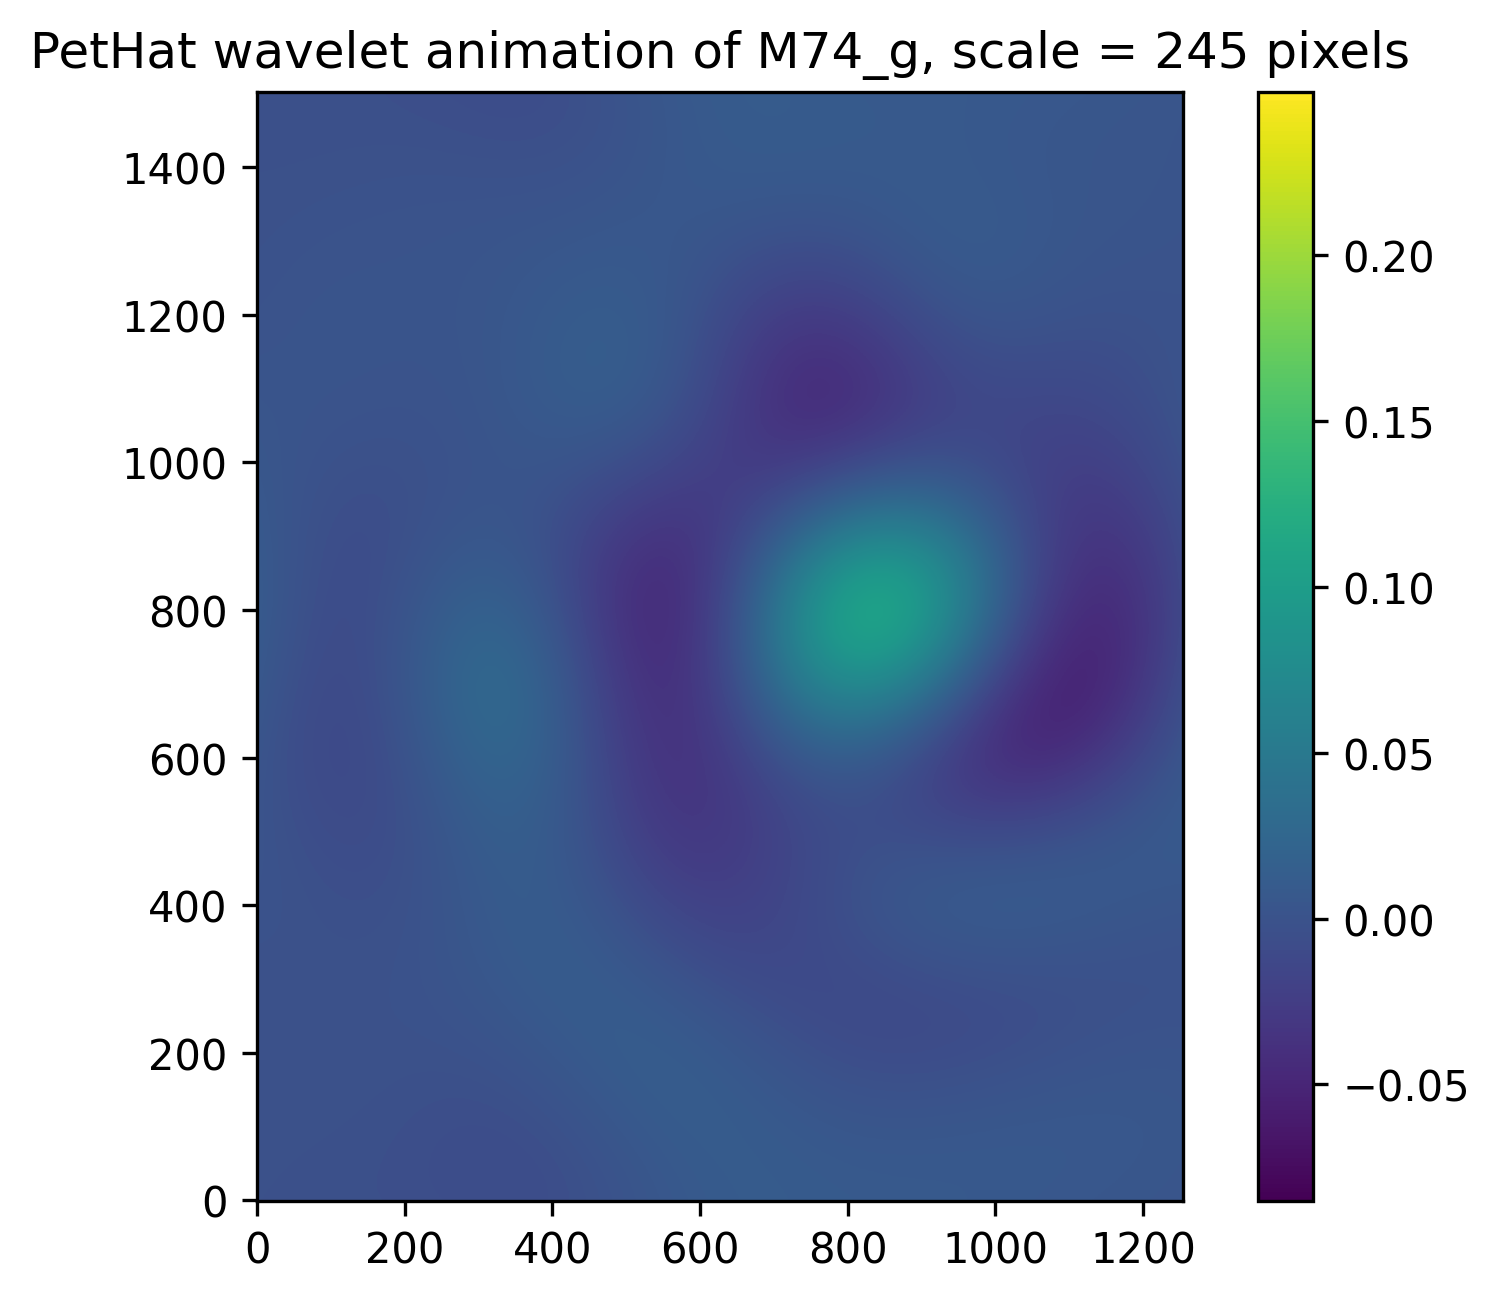

In [31]:
cube_og.save_layers()
cube_og.create_gif()